In [1]:
from PIL import Image, ImageDraw
import face_recognition

In [2]:
# Load the known images
image_of_person_1 = face_recognition.load_image_file("person_1.jpg")
image_of_person_2 = face_recognition.load_image_file("person_2.jpg")
image_of_person_3 = face_recognition.load_image_file("person_3.jpg")

# Get the face encoding of each person. This can fail if no one is found in the photo.
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]

# Create a list of all known face encodings
known_face_encodings = [
    person_1_face_encoding,
    person_2_face_encoding,
    person_3_face_encoding
]

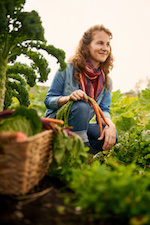

In [4]:
# Load the image we want to check
unknown_image = face_recognition.load_image_file("unknown_7.jpg")

# see the image
pil_unknow_image = Image.fromarray(unknown_image)
pil_unknow_image
# Here the image is very small hence the face won't get detected 
# so we need to zoom the image to get the face locations

In [5]:
# Get face encodings for any people in the picture
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2)
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations=face_locations)

In [6]:
# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:
    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
    
    name = 'Unknown'
    
    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"
        
    print(f'Found {name} in the photo!')

Found Person 2 in the photo!


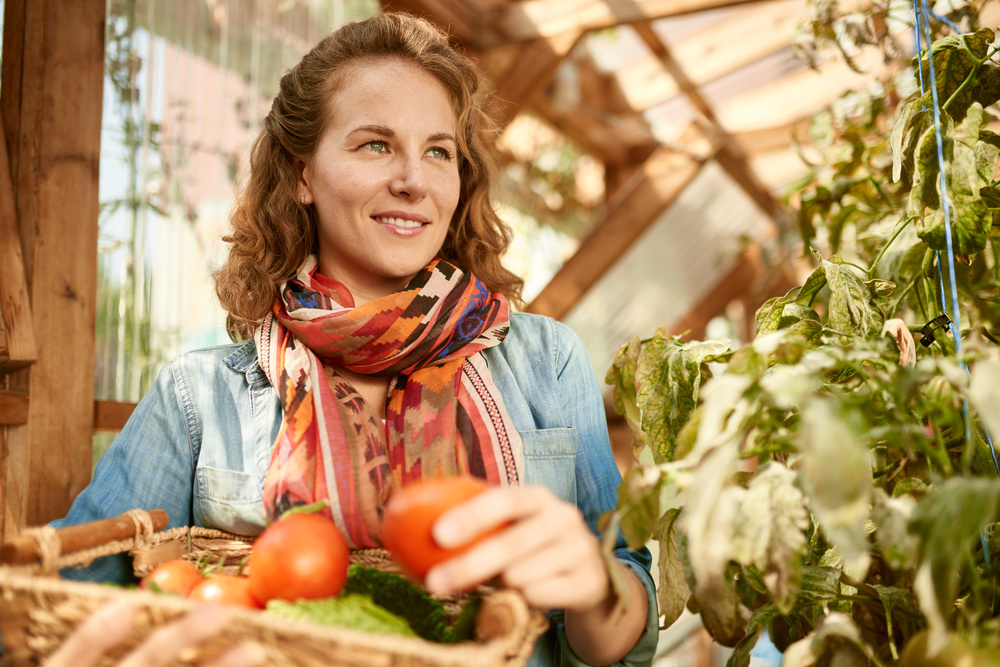

In [8]:
pil_know_img = Image.fromarray(image_of_person_2)
pil_know_img